## 第7章

2つの画像を加算

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

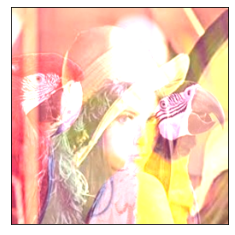

In [2]:
try :
    img1 = cv2.imread('c:/temp/Lenna.jpg')
    img2 = cv2.imread('c:/temp/Parrots.jpg')
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    
    if img1 is None or img2 is None:
        print('error 30')
        import sys
        sys.exit()
    
    img1 = cv2.resize(img1,(255,255))
    img2 = cv2.resize(img2,(255,255))
    dst= cv2.add(img1, img2)
    dst2 = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
    cv2.imwrite('c:/temp/add.jpg',dst)
    
    
    plt.imshow(dst)
    plt.xticks([]), plt.yticks([]) 
    plt.show()

except : 
    import sys
    print("Error:",sys.exc_info()[0])
    print(sys.exc_info()[1])
    import traceback
    print(traceback.format_tb(sys.exc_info()[2]))

スカラーを加算

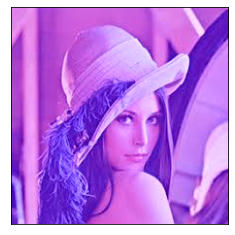

In [11]:
try :
    img1 = cv2.imread('c:/temp/Lenna.jpg')
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
   
    if img1 is None :
        print('error 30')
        import sys
        sys.exit()

    height = img1.shape[0]
    width = img1.shape[1]
    blue = np.zeros((height,width,3),np.uint8)
    blue[:,:] = [128,0,0]
    blue = cv2.cvtColor(blue, cv2.COLOR_BGR2RGB)
    
    dst= cv2.add(img1, blue)
    cv2.imwrite('c:/temp/addScalar.jpg',dst)
    
    
    plt.imshow(dst)
    plt.xticks([]), plt.yticks([]) 
    plt.show()

except : 
    import sys
    print("Error:",sys.exc_info()[0])
    print(sys.exc_info()[1])
    import traceback
    print(traceback.format_tb(sys.exc_info()[2]))

マスク

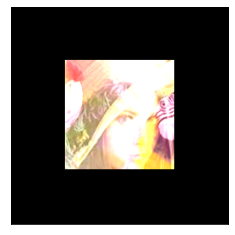

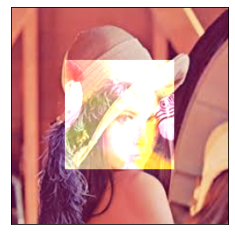

In [13]:
try :
    img1 = cv2.imread('c:/temp/Lenna.jpg')
    img2 = cv2.imread('c:/temp/Parrots.jpg')
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    
    if img1 is None or img2 is None:
        print('error 30')
        import sys
        sys.exit()
    
    img1 = cv2.resize(img1,(255,255))
    img2 = cv2.resize(img2,(255,255))
    height = img1.shape[0]
    width = img1.shape[1]
    
    img_mask = np.zeros((height,width),np.uint8)
    img_mask[height//4:height*3//4,width//4:width*3//4] = [255]
    

    dst = cv2.add(img1,img2,mask = img_mask)
    cv2.imwrite('c:/temp/addMask1.jpg',dst)
    
    plt.imshow(dst)
    plt.xticks([]), plt.yticks([]) 
    plt.show()

    
    dst = cv2.add(img1,img2,dst = img1,mask = img_mask)
    cv2.imwrite("c:/temp/addMask2.jpg",dst)
    
    plt.imshow(dst)
    plt.xticks([]), plt.yticks([]) 
    plt.show()

except : 
    import sys
    print("Error:",sys.exc_info()[0])
    print(sys.exc_info()[1])
    import traceback
    print(traceback.format_tb(sys.exc_info()[2]))

ROI

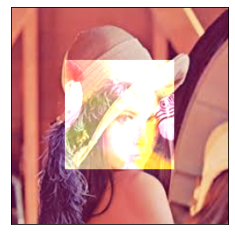

In [16]:
try :
    img1 = cv2.imread('c:/temp/Lenna.jpg')
    img2 = cv2.imread('c:/temp/Parrots.jpg')
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    
    if img1 is None or img2 is None:
        print('error 30')
        import sys
        sys.exit()
    
    img1 = cv2.resize(img1,(255,255))
    img2 = cv2.resize(img2,(255,255))
    
    dst = img1.copy()
    
    height = img1.shape[0]
    width = img1.shape[1]
    
    img1_roi = img1[height//4:height*3//4,width//4:width*3//4]
    img2_roi = img2[height//4:height*3//4,width//4:width*3//4]
    dst_roi = dst[height//4:height*3//4,width//4:width*3//4]
    
    cv2.add(img1_roi,img2_roi,dst_roi)
    cv2.imwrite('c:/temp/dst.jpg',dst)
        
    plt.imshow(dst)
    plt.xticks([]), plt.yticks([]) 
    plt.show()

except : 
    import sys
    print("Error:",sys.exc_info()[0])
    print(sys.exc_info()[1])
    import traceback
    print(traceback.format_tb(sys.exc_info()[2]))

重みを付けた加算

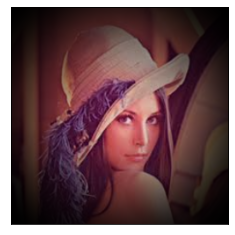

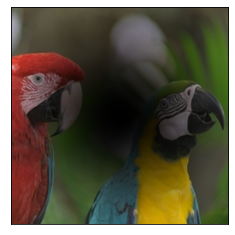

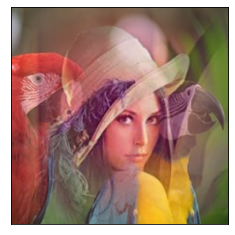

In [20]:
import math

try :
    def create_cos(rows,cols):
        weight = np.zeros((rows,cols,3),np.float32)
        center = (rows/2,cols/2)
        radius = math.sqrt(center[0]**2 + center[1]**2)
        
        for r in range(rows):
            for c in range(cols):
                distance = math.sqrt((center[0] - r)**2 +(center[1] - c)**2)
                
                radian =(distance / radius) * math.pi
                
                Y = (math.cos(radian) + 1.0) / 2.0
                weight[r,c] = [Y,Y,Y]
        
        return weight
    

    img1 = cv2.imread('c:/temp/Lenna.jpg').astype(np.float32)/255
    img2 = cv2.imread('c:/temp/Parrots.jpg').astype(np.float32)/255
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    
    if img1 is None or img2 is None:
        print('error 30')
        import sys
        sys.exit()
    
    img1 = cv2.resize(img1,(255,255))
    img2 = cv2.resize(img2,(255,255))
    
    rows,cols = img1.shape[:2]
    
    weight = create_cos(rows,cols)
    i_weight = 1.0 - weight
    
    int_src1 = cv2.multiply(img1,weight)
    int_src2 = cv2.multiply(img2,i_weight)
    
    dst = cv2.add(int_src1,int_src2)

    cv2.imwrite('c:/temp/int_src1.jpg',int_src1*255)
    cv2.imwrite('c:/temp/int_src2.jpg',int_src2*255)
    cv2.imwrite('c:/temp/dst.jpg',dst*255)
    
    plt.imshow(int_src1)
    plt.xticks([]), plt.yticks([]) 
    plt.show()
    
    plt.imshow(int_src2)
    plt.xticks([]), plt.yticks([]) 
    plt.show()
    
    plt.imshow(dst)
    plt.xticks([]), plt.yticks([]) 
    plt.show()

except : 
    import sys
    print("Error:",sys.exc_info()[0])
    print(sys.exc_info()[1])
    import traceback
    print(traceback.format_tb(sys.exc_info()[2]))

画像の減算

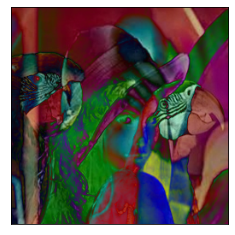

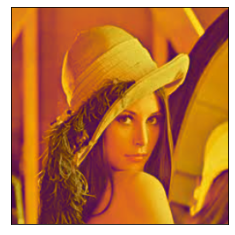

In [22]:
try :
    img1 = cv2.imread('c:/temp/Lenna.jpg')
    img2 = cv2.imread('c:/temp/Parrots.jpg')
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    
    if img1 is None or img2 is None:
        print('error 30')
        import sys
        sys.exit()
    
    img1 = cv2.resize(img1,(255,255))
    img2 = cv2.resize(img2,(255,255))
    
    dst = cv2.absdiff(img1,img2)
    cv2.imwrite('c:/temp/absdiff.jpg',dst)
    
    plt.imshow(dst)
    plt.xticks([]), plt.yticks([]) 
    plt.show()
    
    height = img1.shape[0]
    width = img1.shape[1]
    blue = np.zeros((height,width,3),np.uint8)
    blue[:,:] = [128,0,0]
    blue = cv2.cvtColor(blue, cv2.COLOR_BGR2RGB)

    dst = cv2.absdiff(img1,blue)
    cv2.imwrite('c:/temp/absdiffScalar.jpg',dst)
    
    plt.imshow(dst)
    plt.xticks([]), plt.yticks([]) 
    plt.show()
    
except : 
    import sys
    print("Error:",sys.exc_info()[0])
    print(sys.exc_info()[1])
    import traceback
    print(traceback.format_tb(sys.exc_info()[2]))

2つをブレンド

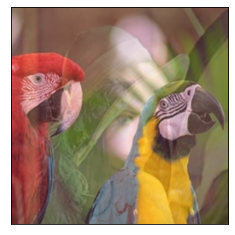

In [23]:
try :
    img1 = cv2.imread('c:/temp/Lenna.jpg')
    img2 = cv2.imread('c:/temp/Parrots.jpg')
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    
    if img1 is None or img2 is None:
        print('error 30')
        import sys
        sys.exit()
    
    img1 = cv2.resize(img1,(255,255))
    img2 = cv2.resize(img2,(255,255))
    dst= cv2.addWeighted(img1,0.3,img2,0.7,0.0)
    cv2.imwrite("c:/temp/blend0307.jpg",dst)

    plt.imshow(dst)
    plt.xticks([]), plt.yticks([]) 
    plt.show()

except : 
    import sys
    print("Error:",sys.exc_info()[0])
    print(sys.exc_info()[1])
    import traceback
    print(traceback.format_tb(sys.exc_info()[2]))

画像の論理和

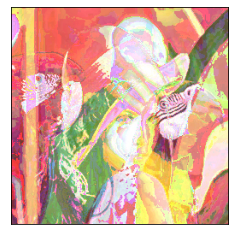

In [24]:
try :
    img1 = cv2.imread('c:/temp/Lenna.jpg')
    img2 = cv2.imread('c:/temp/Parrots.jpg')
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    
    if img1 is None or img2 is None:
        print('error 30')
        import sys
        sys.exit()
    
    img1 = cv2.resize(img1,(255,255))
    img2 = cv2.resize(img2,(255,255))
    dst= cv2.bitwise_or(img1,img2)
    cv2.imwrite("c:/temp/or.jpg",dst)

    plt.imshow(dst)
    plt.xticks([]), plt.yticks([]) 
    plt.show()

except : 
    import sys
    print("Error:",sys.exc_info()[0])
    print(sys.exc_info()[1])
    import traceback
    print(traceback.format_tb(sys.exc_info()[2]))

## 第8章

フレームサイズ表示

In [9]:
try:
    capture = cv2.VideoCapture(0)
    width = capture.get(cv2.CAP_PROP_FRAME_WIDTH)
    height = capture.get(cv2.CAP_PROP_FRAME_HEIGHT)
    
    print("frame size = " + str(width) + " x " + str(height))
except:
    import sys
    print("Error:",sys.exc_imfo()[0])
    print(sys.exc_info([1]))
    import traceback
    print(traceback.format_tb(sys.exc_imfo()[2]))

frame size = 640.0 x 480.0


動画表示

In [3]:
import cv2
try:
    capture = cv2.VideoCapture(0)
    
    while(True):
        ret,frame = capture.read()
        if ret == False:
            print("カメラから映像取得できませんでした")
            break
        
        cv2.imshow('f',frame)
        
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
            
    capture.release()
    cv2.destroyAllWindows()
    
except:
    import sys
    print("Error:",sys.exc_imfo()[0])
    print(sys.exc_info([1]))
    import traceback
    print(traceback.format_tb(sys.exc_imfo()[2]))

カメラから映像取得できませんでした


## 第9章

<ipython-input-12-c260e7937735>:21: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.circle(img,(x,y),4,(255,255,0),2)


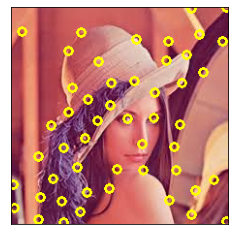

In [12]:
try :
    MAX_CORNERS = 50
    BLOCK_SIZE = 5
    QUIALITY_LEVEL = 0.01
    MIN_DISTANCE = 20.0
    
    img = cv2.imread('c:/temp/Lenna.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    if img is None :
        print('error 30')
        import sys
        sys.exit()
    
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    corners = cv2.goodFeaturesToTrack(gray,MAX_CORNERS,QUIALITY_LEVEL,
                                      MIN_DISTANCE,blockSize = BLOCK_SIZE,useHarrisDetector = False)
    
    for i in corners:
        x,y = i.ravel()
        cv2.circle(img,(x,y),4,(255,255,0),2)
    
    cv2.imwrite('c:/temp/corners.jpg',img)
    
    plt.imshow(img)
    plt.xticks([]), plt.yticks([]) 
    plt.show()
    
except : 
    import sys
    print("Error:",sys.exc_info()[0])
    print(sys.exc_info()[1])
    import traceback
    print(traceback.format_tb(sys.exc_info()[2]))

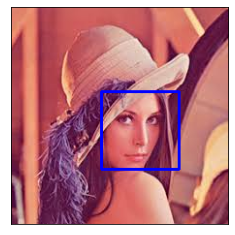

In [34]:
import cv2
try :
    
    img = cv2.imread('c:/temp/Lenna.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    if img is None :
        print('error 30')
        import sys
        sys.exit()
        
    face_path = "haarcascade_frontalface_alt.xml"#学習した結果のでーた
    
    cascade = cv2.CascadeClassifier(face_path)
    facerect = cascade.detectMultiScale(img)   
    
    if len(facerect) > 0:
        for rect in facerect:
            cv2.rectangle(img,tuple(rect[0:2]),tuple(rect[0:2]+rect[2:4]),(0,0,255),thickness=2)
    
    else:
        print("no face")
    
    cv2.imwrite('c:/temp/dobj.jpg',img)
    
    plt.imshow(img)
    plt.xticks([]), plt.yticks([]) 
    plt.show()
    
except : 
    import sys
    print("Error:",sys.exc_info()[0])
    print(sys.exc_info()[1])
    import traceback
    print(traceback.format_tb(sys.exc_info()[2]))

ダメージ補修

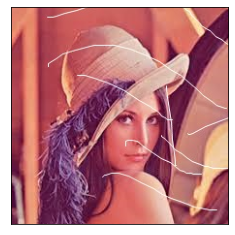

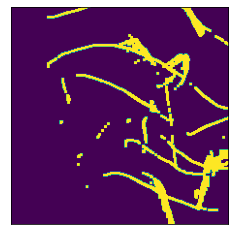

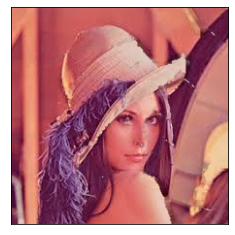

In [50]:
import cv2
try :
    
    img = cv2.imread('c:/temp/Lenna_dg.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    if img is None :
        print('error 30')
        import sys
        sys.exit()
    
    msk = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    ret, msk = cv2.threshold(msk,210,255,cv2.THRESH_BINARY)
    
    cv2.imwrite('c:/temp/msk.jpg',msk)
    kernel = np.ones((3,3),np.uint8)
    msk = cv2.dilate(msk,kernel)
    cv2.imwrite('c:/temp/msk_dilated.jpg',msk)
    dst = img.copy()
    dst = cv2.inpaint(img,msk,1,cv2.INPAINT_TELEA)
    
    cv2.imwrite('c:/temp/dst.jpg',dst)
    
    plt.imshow(img)
    plt.xticks([]), plt.yticks([]) 
    plt.show()
    plt.imshow(msk)
    plt.xticks([]), plt.yticks([]) 
    plt.show()
    plt.imshow(dst)
    plt.xticks([]), plt.yticks([]) 
    plt.show()
    
except : 
    import sys
    print("Error:",sys.exc_info()[0])
    print(sys.exc_info()[1])
    import traceback
    print(traceback.format_tb(sys.exc_info()[2]))

テンプレートマッチング

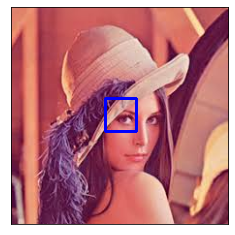

In [52]:
import cv2
try :
    
    img = cv2.imread('c:/temp/Lenna.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    templ = cv2.imread("c:/temp/Lenna_templ.jpg")
    
    if img is None or templ is None:
        print('error 30')
        import sys
        sys.exit()
    
    result = cv2.matchTemplate(img,templ,cv2.TM_CCOEFF_NORMED)
    mmr = cv2.minMaxLoc(result)
    pos = mmr[3]
    
    dst = img.copy()
    cv2.rectangle(dst,pos,(pos[0] + templ.shape[1],pos[1] + templ.shape[0]),(0,0,255),2)
    
    cv2.imwrite('c:/temp/dst_match.jpg',dst)
    
    plt.imshow(dst)
    plt.xticks([]), plt.yticks([]) 
    plt.show()
    
except : 
    import sys
    print("Error:",sys.exc_info()[0])
    print(sys.exc_info()[1])
    import traceback
    print(traceback.format_tb(sys.exc_info()[2]))

特徴点検出

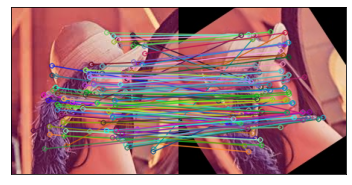

In [57]:
import cv2

try :
    
    img1 = cv2.imread('c:/temp/Lenna.jpg')
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2 = cv2.imread("c:/temp/rotate_033.jpg")
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    
    if img1 is None or img2 is None:
        print('error 30')
        import sys
        sys.exit()
    
    detector = cv2.AKAZE_create()
    keypoints1,descriptor1 = detector.detectAndCompute(img1,None)
    keypoints2,descriptor2 = detector.detectAndCompute(img2,None)    
    
    matcher = cv2.BFMatcher(cv2.NORM_HAMMING)
    matches = matcher.match(descriptor1,descriptor2)
    dst = cv2.drawMatches(img1,keypoints1,img2,keypoints2,matches,None,flags=2)
    
    cv2.imwrite('c:/temp/dst_tokutyo.jpg',dst)
    
    plt.imshow(dst)
    plt.xticks([]), plt.yticks([]) 
    plt.show()
    
except : 
    import sys
    print("Error:",sys.exc_info()[0])
    print(sys.exc_info()[1])
    import traceback
    print(traceback.format_tb(sys.exc_info()[2]))